In [2]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target

print("Iris dataset loaded successfully.")
print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")


Iris dataset loaded successfully.
Shape of features (X): (150, 4)
Shape of target (y): (150,)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. 데이터를 훈련 세트와 테스트 세트로 분할합니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and test sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

# 2. Logistic Regression 모델의 인스턴스를 생성합니다.
model_lr = LogisticRegression(solver='liblinear', random_state=42)

# 3. 훈련 세트를 사용하여 로지스틱 회귀 모델을 훈련시킵니다.
model_lr.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

# 4. 훈련된 모델을 사용하여 테스트 세트에 대한 예측을 수행합니다.
y_pred_lr = model_lr.predict(X_test)

print('y_pred_lr : ', y_pred_lr)

print("Predictions made on the test set.")

# 5. 실제 테스트 세트 레이블과 모델의 예측을 비교하여 정확도를 계산하고 출력합니다.
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Model Accuracy: {accuracy_lr:.4f}")

Data split into training and test sets successfully.
X_train shape: (120, 4)
X_test shape: (30, 4)
y_train shape: (120,)
y_test shape: (30,)
Logistic Regression model trained successfully.
y_pred_lr :  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Predictions made on the test set.
Logistic Regression Model Accuracy: 1.0000


In [4]:
from sklearn.cluster import KMeans

# 1. n_clusters를 3으로 설정하여 KMeans 모델의 인스턴스를 생성합니다.
# random_state를 42로 설정하여 결과를 재현 가능하게 하고, init을 'k-means++'로 설정합니다.
model_kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10)

# 2. 원본 특성 데이터 X에 KMeans 모델을 훈련시킵니다.
model_kmeans.fit(X)

# 3. 훈련된 모델로부터 각 데이터 포인트에 대한 군집 레이블을 얻어 clusters_kmeans 변수에 저장합니다.
clusters_kmeans = model_kmeans.labels_

print("K-Means clustering applied successfully.")
print(f"Shape of K-Means cluster labels: {clusters_kmeans.shape}")
print("First 10 K-Means cluster labels:")
print(clusters_kmeans[:10])

K-Means clustering applied successfully.
Shape of K-Means cluster labels: (150,)
First 10 K-Means cluster labels:
[1 1 1 1 1 1 1 1 1 1]


In [5]:
from sklearn.decomposition import PCA

# 1. n_components를 2로 설정하고 random_state를 42로 설정하여 PCA 모델의 인스턴스를 생성합니다.
pca = PCA(n_components=2, random_state=42)

# 2. 원본 특성 데이터 X에 PCA 모델을 훈련시키고 데이터의 차원을 축소하여 X_pca 변수에 저장합니다.
X_pca = pca.fit_transform(X)

print("PCA applied successfully.")
print(f"Shape of original features (X): {X.shape}")
print(f"Shape of PCA-transformed features (X_pca): {X_pca.shape}")
print("First 5 rows of PCA-transformed data:")
print(X_pca[:5])

PCA applied successfully.
Shape of original features (X): (150, 4)
Shape of PCA-transformed features (X_pca): (150, 2)
First 5 rows of PCA-transformed data:
[[-2.68412563  0.31939725]
 [-2.71414169 -0.17700123]
 [-2.88899057 -0.14494943]
 [-2.74534286 -0.31829898]
 [-2.72871654  0.32675451]]


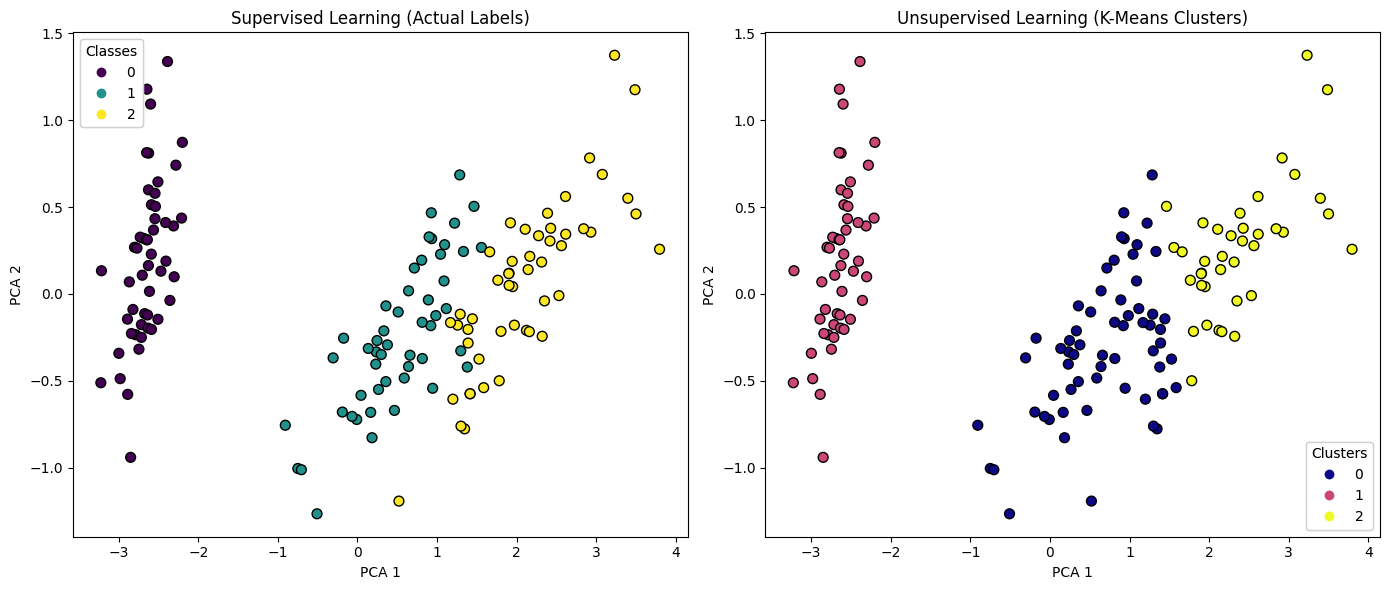

Visualized supervised and unsupervised learning results on PCA-reduced data.


In [6]:
import matplotlib.pyplot as plt

# 2. 두 개의 서브플롯을 생성합니다.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# 3. 첫 번째 서브플롯 (ax1)에 PCA 변환된 데이터를 실제 타겟 레이블 y에 따라 산점도를 그립니다.
# 각 클래스를 다른 색상으로 구분하고 범례를 추가합니다.
scatter1 = ax1.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
ax1.set_xlabel('PCA 1')
ax1.set_ylabel('PCA 2')
ax1.set_title('Supervised Learning (Actual Labels)')
legend1 = ax1.legend(*scatter1.legend_elements(), title='Classes')
ax1.add_artist(legend1)

# 5. 두 번째 서브플롯 (ax2)에 PCA 변환된 데이터를 K-Means 군집 레이블 clusters_kmeans에 따라 산점도를 그립니다.
# 각 군집을 다른 색상으로 구분하고 범례를 추가합니다.
scatter2 = ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_kmeans, cmap='plasma', edgecolor='k', s=50)
ax2.set_xlabel('PCA 1')
ax2.set_ylabel('PCA 2')
ax2.set_title('Unsupervised Learning (K-Means Clusters)')
legend2 = ax2.legend(*scatter2.legend_elements(), title='Clusters')
ax2.add_artist(legend2)

# 7. plt.tight_layout()을 호출하여 서브플롯 간의 간격을 자동으로 조정하고, plt.show()를 호출하여 시각화된 결과를 표시합니다.
plt.tight_layout()
plt.show()

print("Visualized supervised and unsupervised learning results on PCA-reduced data.")